## SUPPORT VECTOR REGRESSOR
- Which solve regressor problem
 

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

In [3]:
# make regreesor datapoint 
from sklearn.datasets import make_regression

In [4]:
x,y = make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3)


In [5]:
x
# 2d araryt 

array([[-0.12939223,  1.62553441],
       [-0.45039088, -0.21826486],
       [-0.97812831,  1.3499174 ],
       ...,
       [ 0.95353462, -0.03316388],
       [ 1.16872458,  0.67637069],
       [-0.43105189, -0.32421585]])

In [8]:
# convert x into dataframe 
X = pd.DataFrame(x,columns=['f1','f2'])
X.head()

,f1,f2
0,-0.129392,1.625534
1,-0.450391,-0.218265
2,-0.978128,1.349917
3,-1.452338,0.086954
4,-2.223473,0.604769


In [9]:
y

array([ 1.24712400e+02, -3.47237357e+01,  6.91987889e+01, -4.91455508e+01,
       -3.60802814e+01,  5.68867810e+01, -2.10969403e+02, -5.35931305e+01,
        1.14088511e+01,  2.06636732e+01,  7.19913146e+01, -1.66989587e+02,
        2.48978337e+01,  1.12974729e+01, -9.27563665e+01, -8.63186903e+01,
        4.64054344e+01, -2.41804989e+01, -1.17259169e+01, -9.44626436e+00,
       -5.00657300e+01, -6.13823678e+01, -6.00846556e+01,  6.73037266e+01,
        1.82431856e+01,  5.47071329e+01, -4.03987479e+00,  5.96025801e+01,
        5.58679418e+01,  1.73804268e+02,  1.22364560e+02,  1.59042550e+02,
       -7.94849470e+01, -6.53013836e+01,  1.39365041e+02, -1.07449990e+02,
       -1.23773311e+02,  2.13063198e+01, -1.41527672e+01, -1.33947716e+02,
       -1.36425037e+02,  3.71065209e+01, -9.77225847e+01, -1.22467868e+01,
       -8.59676333e+01,  1.52821008e+01,  1.34001149e+02,  7.84340301e+01,
        6.20342764e+01,  9.01292933e+01, -2.54367180e+01, -5.37971963e+01,
        2.59665584e+01, -

<AxesSubplot: xlabel='f1', ylabel='f2'>

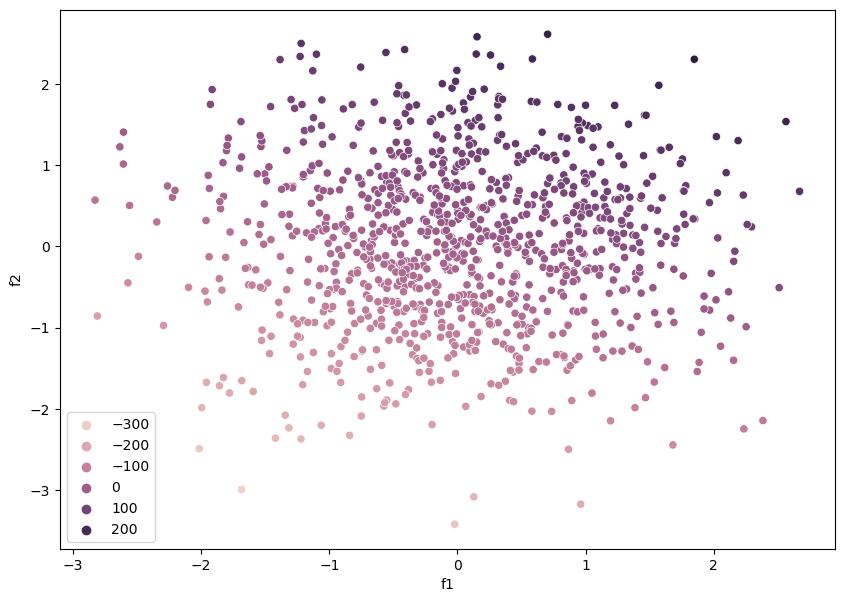

In [16]:
# grraph plot btw f1 and f2
plt.figure(figsize=(10,7))
sns.scatterplot(x=X['f1'],y=X['f2'],hue=y)

In [17]:
# train_test split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.25,random_state=42)

In [18]:
x_train.shape,y_train.shape

((750, 2), (750,))

In [20]:
# svr\
from sklearn.svm import SVR

# model creation 
svr = SVR(kernel='linear')

# ttraine the model 
svr.fit(x_train,y_train)

SVR(kernel='linear')

In [21]:
svr.coef_

array([[38.75333228, 79.66225109]])

In [23]:
svr.intercept_

array([-0.01440289])

In [24]:
# predict the data 
y_test_pred = svr.predict(x_test)
y_test_pred

array([-3.14892486e+01,  7.97586246e+01,  7.17167709e+01,  1.19312629e+02,
       -1.06205174e+02,  2.11889322e+01, -2.38297706e+01, -3.23103098e+01,
        2.55266264e+02, -1.10804093e+01, -2.43199595e+02, -4.49789249e+01,
        1.38289492e+02,  2.89545323e+00, -6.33873525e+01, -4.63951501e+01,
        1.00456854e+02, -1.82589378e+02, -6.33824254e+01,  2.04984964e+01,
        7.73738676e+01, -1.08950275e+02, -3.14526356e+00,  2.56937222e+01,
        2.27483985e+01,  6.07450812e+01, -9.47643468e+01,  3.48420398e+01,
        6.72154019e+00,  1.32644116e+01,  9.83223096e+01, -2.89624604e+01,
        9.34435966e+01, -9.44211879e+01, -7.19055073e+01, -2.96156729e+01,
       -5.67216859e+01, -7.74091205e+01, -4.54875980e+01,  1.08830213e+02,
       -8.40010375e+01, -5.77032828e+01, -1.66418857e+02,  1.08588836e+02,
        6.74316770e+01, -7.86200468e+01,  8.40598231e+01,  2.16045715e+01,
        4.27860052e+01,  2.57083691e+01, -1.01137275e+02, -8.10902641e+01,
       -1.76721527e+01,  

In [25]:
# accuracy cehck 
from sklearn.metrics import r2_score

score = r2_score(y_test,y_test_pred)
score

0.9983938697140192

In [26]:
# hyperparameter tuning 
parameter = {'C':[0.01,0.1,1,10,100],
             'gamma':[1,0.1,0.01,0.001,0.001],
             'kernel':['linear'],
             'epsilon':[0.1,0.2,0.3]
            }

from sklearn.model_selection import GridSearchCV

# model creation
clf = GridSearchCV(svr,param_grid=parameter,cv=5,verbose=3)
# verbosa dile more information show hbe 

clf.fit(x_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.01, epsilon=0.1, gamma=1, kernel=linear;, score=0.100 total time=   0.0s
[CV 2/5] END C=0.01, epsilon=0.1, gamma=1, kernel=linear;, score=0.101 total time=   0.0s
[CV 3/5] END C=0.01, epsilon=0.1, gamma=1, kernel=linear;, score=0.111 total time=   0.0s
[CV 4/5] END C=0.01, epsilon=0.1, gamma=1, kernel=linear;, score=0.092 total time=   0.0s
[CV 5/5] END C=0.01, epsilon=0.1, gamma=1, kernel=linear;, score=0.110 total time=   0.0s
[CV 1/5] END C=0.01, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.100 total time=   0.0s
[CV 2/5] END C=0.01, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.101 total time=   0.0s
[CV 3/5] END C=0.01, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.111 total time=   0.0s
[CV 4/5] END C=0.01, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.092 total time=   0.0s
[CV 5/5] END C=0.01, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.110 total time=   0.0s
[CV 1/5] END C=0.01, epsilon

GridSearchCV(cv=5, estimator=SVR(kernel='linear'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.001],
                         'kernel': ['linear']},
             verbose=3)

In [27]:
# best paramaeter 
clf.best_params_

{'C': 100, 'epsilon': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [28]:
# predcit 
y_test_pred = clf.predict(x_test)
y_test_pred

array([-3.17055500e+01,  7.98975429e+01,  7.20143056e+01,  1.19804936e+02,
       -1.06816560e+02,  2.12816742e+01, -2.39819805e+01, -3.25402448e+01,
        2.56304157e+02, -1.11505391e+01, -2.44275277e+02, -4.51261789e+01,
        1.38830026e+02,  2.77046599e+00, -6.37495224e+01, -4.65449891e+01,
        1.00868680e+02, -1.83359178e+02, -6.36667197e+01,  2.05169655e+01,
        7.76101853e+01, -1.09451426e+02, -3.24626769e+00,  2.57087608e+01,
        2.28035514e+01,  6.09185475e+01, -9.52257027e+01,  3.49700835e+01,
        6.65595977e+00,  1.32668009e+01,  9.87552403e+01, -2.91863062e+01,
        9.38120444e+01, -9.48747937e+01, -7.22566839e+01, -2.98078739e+01,
       -5.70314691e+01, -7.77949510e+01, -4.57578398e+01,  1.09172868e+02,
       -8.44726346e+01, -5.80491964e+01, -1.67250558e+02,  1.08952537e+02,
        6.75658300e+01, -7.89458405e+01,  8.43310153e+01,  2.15616512e+01,
        4.29222719e+01,  2.58721432e+01, -1.01616698e+02, -8.15165853e+01,
       -1.78561344e+01,  

In [30]:
# accuracy cehck
# accuracy cehck 
from sklearn.metrics import r2_score

score = r2_score(y_test,y_test_pred)
score

0.9983848499768486